# 1.3.3 인구에 따른 살인 비율의 위치 추정

* 패키지 설치 `install.packages("dplyr", dependencies=TRUE)`

In [14]:
state <- read.csv(file="raw_data/state.csv")

평균

In [3]:
mean(state[["Population"]])

[1] 6162876

절사 평균(10%)

In [4]:
mean(state[["Population"]], trim=0.1)

[1] 4783697

중간값

In [5]:
median(state[["Population"]])

[1] 4436370

In [6]:
install.packages("matrixStats", dependencies=TRUE)

package 'matrixStats' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LG\AppData\Local\Temp\RtmpIHO1YK\downloaded_packages


가중평균

In [7]:
weighted.mean(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.445834

In [8]:
library("matrixStats")

Warning message:
"package 'matrixStats' was built under R version 3.6.3"

In [9]:
weightedMedian(state[["Murder.Rate"]], w=state[["Population"]])

[1] 4.4

# 1.4.3 주별 인구의 변위 추정

표준편차

In [10]:
sd(state[["Population"]]) 

[1] 6848235

사분위범위

In [11]:
IQR(state[["Population"]])

[1] 4847308

중위절대편차

In [12]:
mad(state[["Population"]])

[1] 3849870

표준편차는 MAD의 거의 두배가 된다. 왜냐하면 표준편차는 특잇값에 민감하기 때문이다.

# 1.5.1 백분위수와 상자그림

In [16]:
quantile(state[["Murder.Rate"]], p=c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

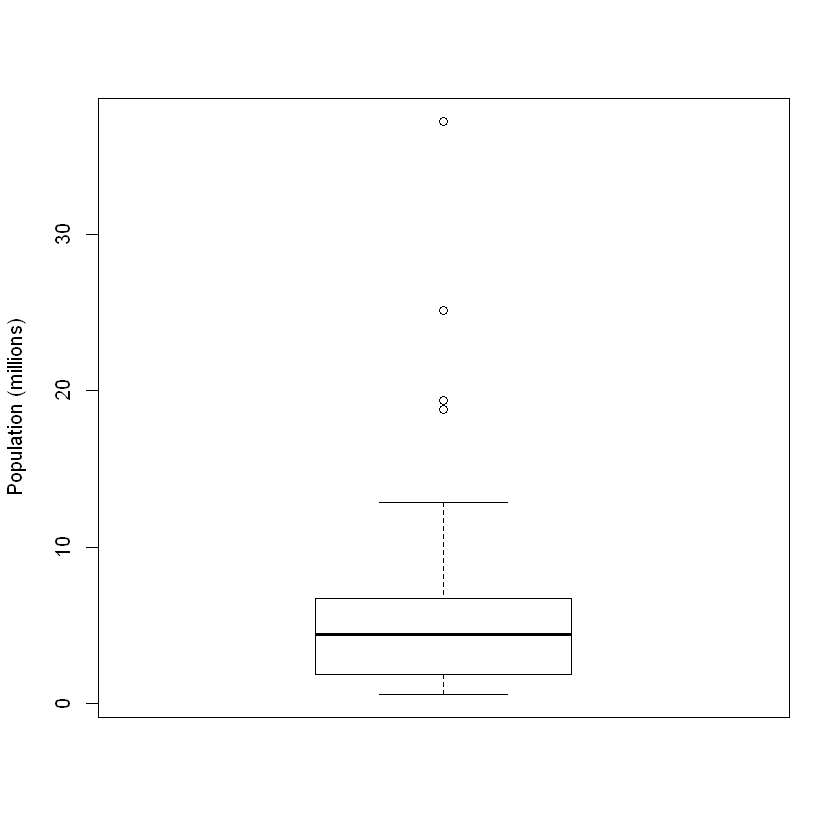

In [17]:
boxplot(state[["Population"]]/1000000, ylab="Population (millions)")